## Identify the Top 3 Most Profitable Products

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
purchase_behaviour = pd.read_csv("purchase_behaviour.csv")
transactions = pd.read_csv("transaction_data.csv")


In [40]:
# data preperocessing- checking that is their are some null values
print(purchase_behaviour.isnull().sum())
print(transactions.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [43]:
# hence their are not any null values so we can merge the table on parameter LYLTY_CARD_NBR,to find top 3 profitable products
df = transactions.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [45]:

df = transactions.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")
df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [47]:
# so finding the total sales by using groupby on products

In [49]:
grouped = df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
grouped_order = grouped.sort_values(by="TOT_SALES", ascending=False)


In [51]:
## finding first three 
print(grouped_order.head(3))


                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [53]:
# hence  Dorito Corn Chp, Smiths Crnkle Chip  Orgnl, Smiths Crinkle Chips Salt & Vinegar  is the 3 most profitable 

## loyal customers

In [56]:
# Count transactions per customer
loyal_customers = df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()

# Merge with purchase behavior data
loyal_customers = loyal_customers.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

# Display top 5 most frequent shoppers
loyal_customers = loyal_customers.sort_values(by="TXN_ID", ascending=False)
print(loyal_customers.head(5))


       LYLTY_CARD_NBR  TXN_ID              LIFESTAGE PREMIUM_CUSTOMER
42813          162039      18         OLDER FAMILIES       Mainstream
45905          172032      18  YOUNG SINGLES/COUPLES       Mainstream
3686            13138      17         YOUNG FAMILIES       Mainstream
31654          116181      17         YOUNG FAMILIES          Premium
34943          128178      17         OLDER FAMILIES       Mainstream


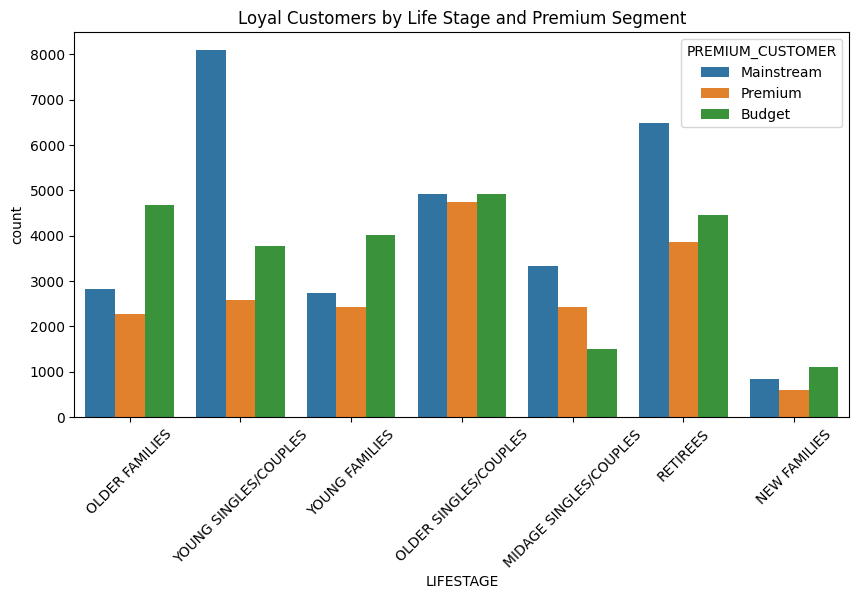

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loyal_customers, x="LIFESTAGE", hue="PREMIUM_CUSTOMER")
plt.title("Loyal Customers by Life Stage and Premium Segment")
plt.xticks(rotation=45)
plt.show()


In [59]:
# summary

In [60]:
# most loyal customers are not premium there is only one customer whou is premimum as well as loyal

In [64]:
# most frequent buyers are family that might be older or the new

In [66]:
# older family has high purchasing power

In [69]:
# Families (Older & Young) tend to have higher purchase frequencies- They may buy in larger quantities or make repeat purchases for essential goods.
# Mainstream products are likely more affordable & frequently needed- Since most loyal customers are Mainstream, they might focus on budget-friendly, everyday products rather than luxury items.